In [49]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
#w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#lemmatizer = nltk.stem.WordNetLemmatizer()
nltk.download('punkt')
from nltk.corpus import PlaintextCorpusReader
from nltk.collocations import *
import re
import itertools # For sorting list and removing duplicates
from sklearn.feature_extraction.text import TfidfVectorizer
import os

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tamaralottering/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Pre-processing Corpus

In [50]:
# take all the text files and compile into one textList
textList = []
for dirname, _, filenames in os.walk('/Users/tamaralottering/Desktop/nls-text-indiaPapers/'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        myfile = os.path.join(dirname, filename)
        with open(myfile, 'rb') as fopen:
            q = fopen.read().decode('ISO-8859-1')
            textList.append(q)        

In [52]:
# create a dataframe of the corpus
df = pd.DataFrame(textList)
df.head()

,0
0,IP/QB.10 m.91.b. No. 44. (NEW SERIES.) SCIENTI...
1,IP/6/HG.s4. REPORT ON THE CALCUTTA MEDICAL INS...
2,"CHOLERA IN INDIA, 1862 TO 1881. BENGAL PROVINC..."
3,Vol. I 1931 THE Indian Journal of Veterinary S...
4,"IP/QB, 10 m.91.b No. 19. (NEW SERIES.) SCIENTI..."


In [53]:
df = pd.DataFrame(textList)
df.tail()

,0
465,[NLS note: a graphic appears here - see image ...
466,REPORT ON THE WORKING OF THE MENTAL HOSPITALS ...
467,ICAR. 15. VIII. 650 Vol. VIII 1938 THE Indian ...
468,SLEEPING SICKNESS A SUMMARY OF THE WORK DONE B...
469,[NLS note: a graphic appears here - see image ...


In [54]:
def cleanTextInDf(mystring):
    mystring = mystring.lower() #Text normalization: make string lowercase
    mystring = re.sub(r'[^\w\s]','', mystring) #Text normalization: remove punctuation
    mystring = re.sub('\[.*?\]', '', mystring) #Text normalization: remove text in square brackets
    mystring = re.sub('https?://\S+|www\.\S+', '', mystring) #Text normalization: removelinks
    mystring = re.sub('\n', '', mystring) #Text normalization: 
    mystring = re.sub('\w*\d\w*', '', mystring)#Text normalization: 
    
    return mystring

In [55]:
# Tokenize and Lemmatize the text (NLP standardisation methods)
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(mystring):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(mystring)]

In [56]:
df.columns = ['text'] #rename col
df.head()

,text
0,IP/QB.10 m.91.b. No. 44. (NEW SERIES.) SCIENTI...
1,IP/6/HG.s4. REPORT ON THE CALCUTTA MEDICAL INS...
2,"CHOLERA IN INDIA, 1862 TO 1881. BENGAL PROVINC..."
3,Vol. I 1931 THE Indian Journal of Veterinary S...
4,"IP/QB, 10 m.91.b No. 19. (NEW SERIES.) SCIENTI..."


In [57]:
# apply the cleanTextDf function
cleanText = lambda text: cleanTextInDf(text) # Lambda function applies to all cells in a column
cleandf = pd.DataFrame(df.text.apply(cleanText)) # .apply() the function to all cells
df['text'] = cleandf['text']
df

,text
0,no new series scientific memoirs by officer...
1,report on the calcutta medical institutions f...
2,cholera in india to bengal province to and...
3,vol i the indian journal of veterinary scienc...
4,ipqb no new series scientific memoirs by of...
...,...
465,nls note a graphic appears here see image of ...
466,report on the working of the mental hospitals ...
467,icar viii vol viii the indian journal of ve...
468,sleeping sickness a summary of the work done b...


### TF-IDF

In [58]:
# function to turn the text into an array to apply ML models (NB: ML needs to work with numbers in arrays/vectors)
arr = df["text"].to_numpy()
arr = arr.tolist()

In [59]:
tfidf = TfidfVectorizer(stop_words='english')

In [60]:
# function to return most important words in each text
def get_top_tf_idf_words(response, top_n=3):
    sorted_nzs = np.argsort(response.data)[:-(top_n+1):-1]
    return feature_names[response.indices[sorted_nzs]]

 Learning resources: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [61]:
# sort the corpus into 20% to train the ML model and the remaining 80% is what the ML model will be applied on
corpus = arr
corpusLen = len(corpus)
trainingLen = corpusLen * 0.2 # Train it on 20% of the text items
trainingLen = int(trainingLen)
trainArr = corpus[:trainingLen] # First 20% of corpus
restArr = corpus[-(len(corpus)-trainingLen-4):] # Last 80% of corpus
X = tfidf.fit_transform(trainArr)# scale the parameters (mean & sd) of the training data
feature_names = np.array(tfidf.get_feature_names())
responses = tfidf.transform(restArr) #use the parameters from training data on rest of data
resultsArr = [get_top_tf_idf_words(response,4) for response in responses]
finalArr = [l.tolist() for l in resultsArr]

In [63]:
# print out all the 4 most important words from each text together
allWords = []
for item in finalArr:
    print(item)
    allWords = allWords + item

['vaccination', 'total', 'inspectors', 'year']
['acidfast', 'streptothrix', 'ims', 'captain']
['plague', 'shall', 'railway', 'officer']
['venom', 'serum', 'snake', 'cobra']
['flagellates', 'herpetomonas', 'fig', 'parasites']
['regiment', 'army', 'sketch', 'detachment']
['asylums', 'burma', 'lunatic', 'males']
['women', 'soldiers', 'lockhospital', 'disease']
['intestine', 'species', 'worms', 'parasites']
['veterinary', 'year', 'rs', 'total']
['elephants', 'treatise', 'elephant', 'animal']
['milk', 'ghee', 'cent', 'animals']
['plague', 'shall', 'officer', 'collector']
['veterinary', 'year', 'punjab', 'stallions']
['surra', 'rats', 'rat', 'blood']
['veterinary', 'rs', 'year', 'total']
['hookworms', 'excrement', 'worms', 'bowels']
['plague', 'shall', 'officer', 'collector']
['sect', 'medical', 'vol', 'oz']
['venom', 'blood', 'daboia', 'coagulability']
['parasite', 'fig', 'protoplasm', 'cell']
['water', 'town', 'privies', 'cantonment']
['veterinary', 'itinerant', 'stationary', 'year']
['vet

In [69]:
# chuck all these words from the corpus together into one string
corpusStr1 = ' '.join(allWords)

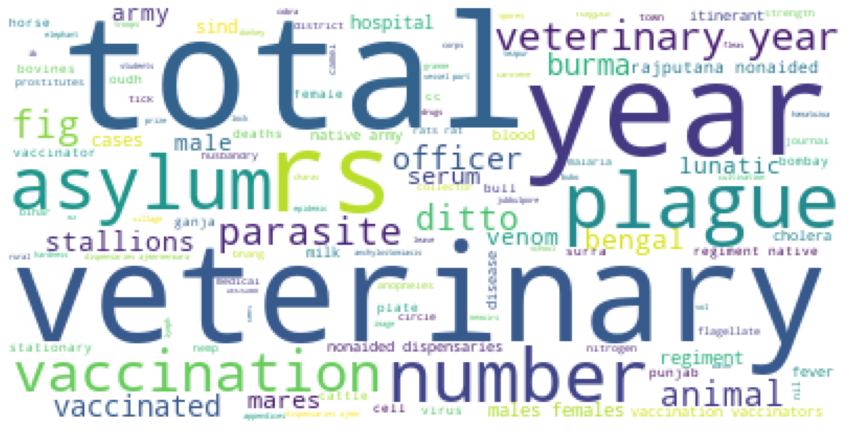

In [67]:
# create a wordcloud of all these key words from the corpus
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(corpusStr1)
rcParams['figure.figsize'] = 15, 30
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<BarContainer object of 80 artists>

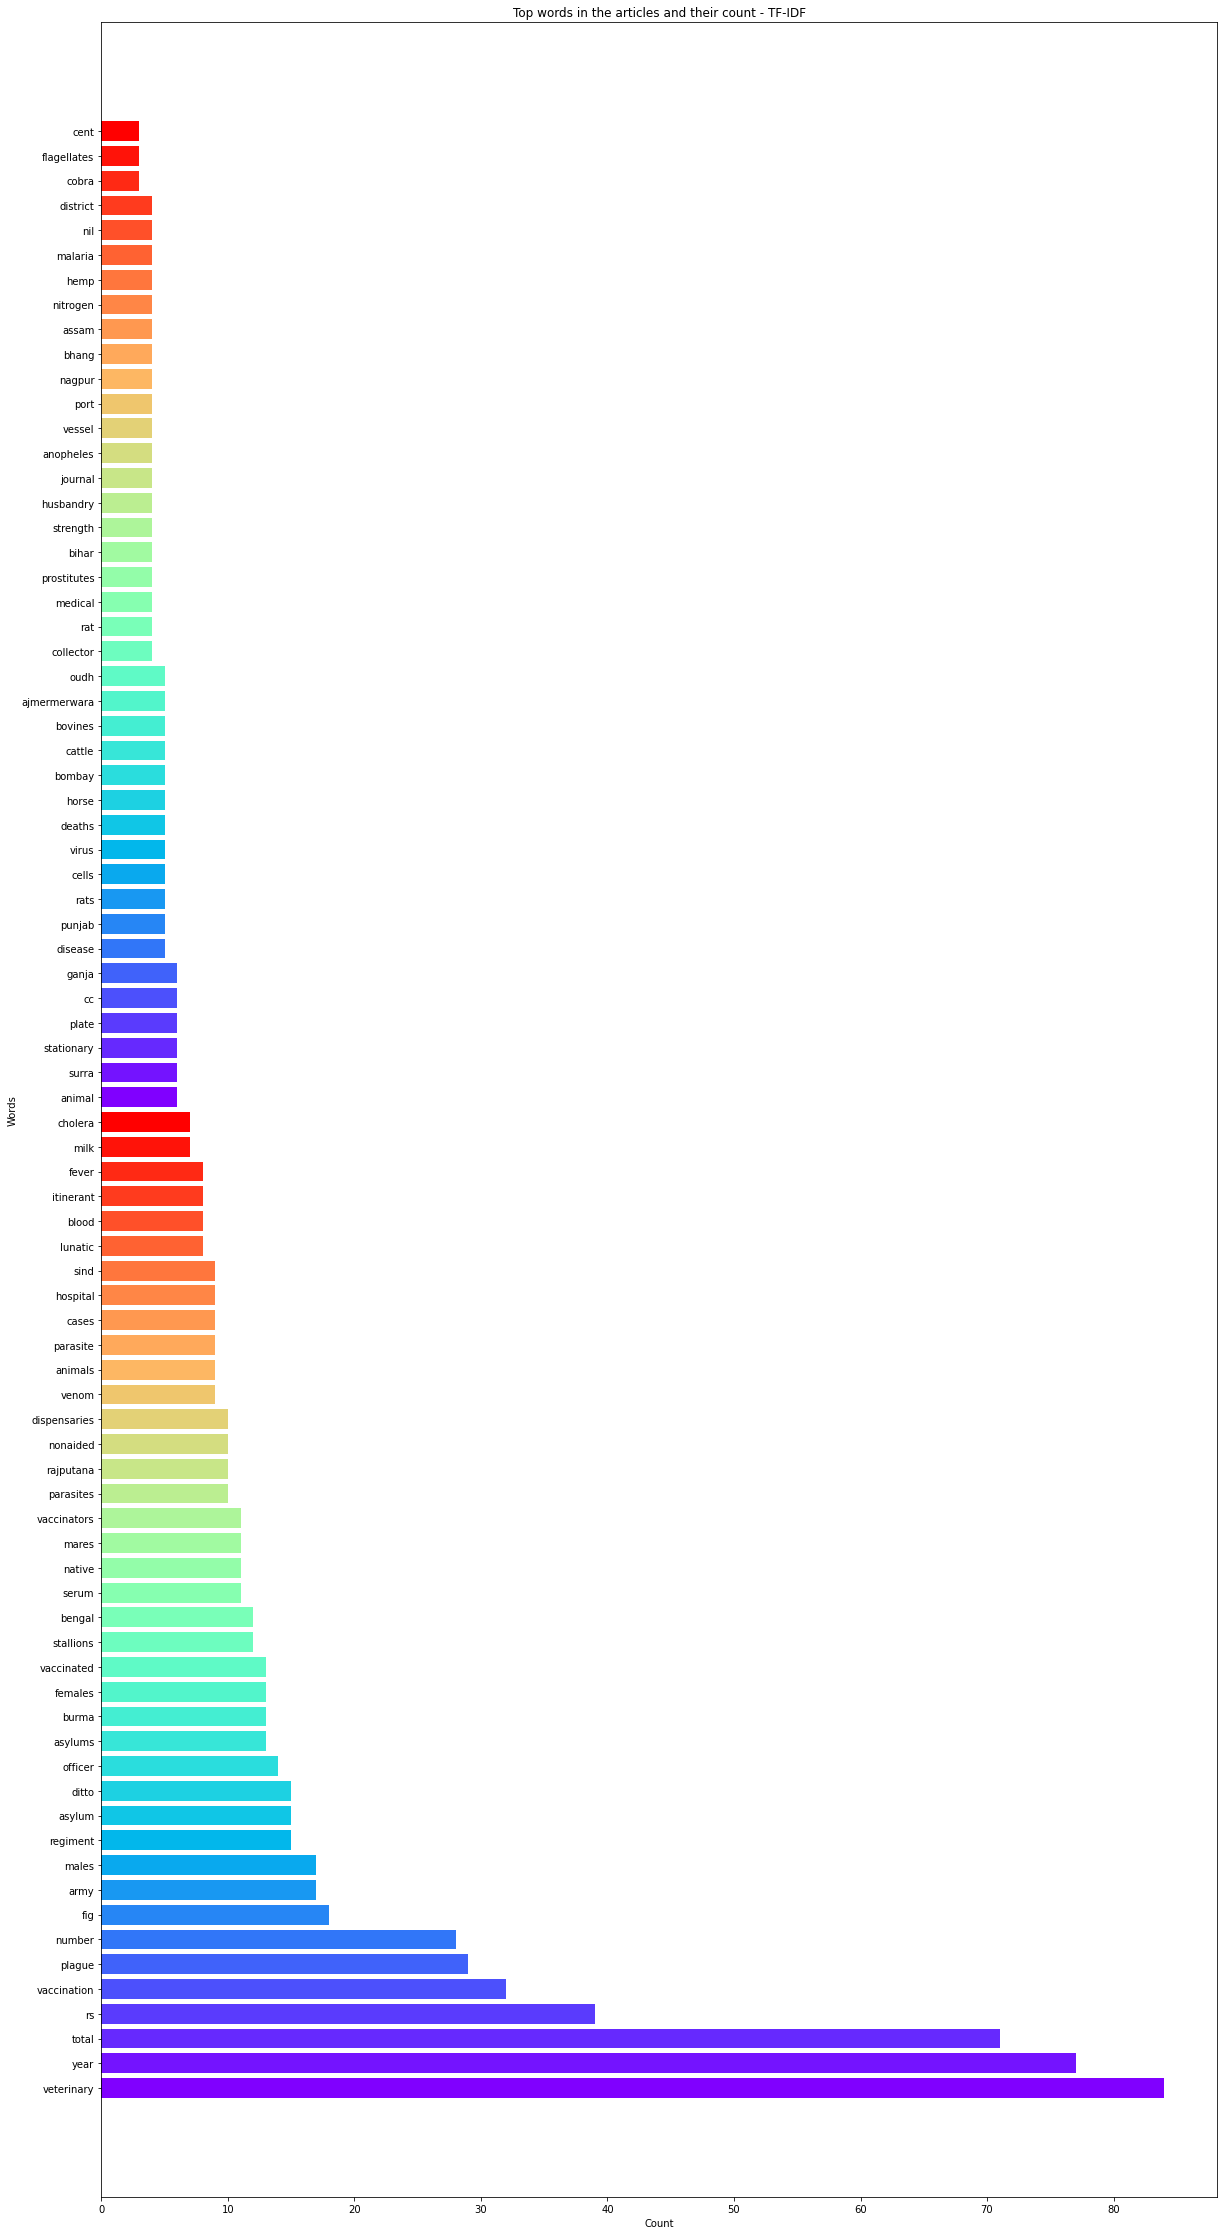

In [68]:
filtered_words = [word for word in corpusStr1.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(80):
    words.append(letter)
    counts.append(count)

colors = cm.rainbow(np.linspace(0, 1, 40))
rcParams['figure.figsize'] = 20, 40

plt.title('Top words in the articles and their count - TF-IDF')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

### Some observations 

- there is actually quite a lot of mention of animals, veterinary, animal husbandry, 
- Presidencies and Provinces of British India (see full https://en.wikipedia.org/wiki/Presidencies_and_provinces_of_British_India)
    - Bengal, assam, bihar: region During the colonial era it included areas of the neighbouring states of Bihar, Odisha, Assam and Tripura.
    https://en.wikipedia.org/wiki/Bengal
    - Burma: (currently Myanmar) The British East India Company seized control of the administration of Myanmar after three Anglo-Burmese Wars in the 19th century, and the country became a British colony.
    - Rajputana: egion in India that included mainly the present-day Indian state of Rajasthan, as well as parts of Madhya Pradesh and Gujarat, and some adjoining areas of Sindh in modern-day southern Pakistan.https://en.wikipedia.org/wiki/Rajputana
    - Punjab: In British India, until the Partition of India in 1947, the Punjab Province encompassed the present-day Indian states and union territories of Punjab, Haryana, Himachal Pradesh, Chandigarh, and Delhi and the Pakistani regions of Punjab and Islamabad Capital Territory.https://en.wikipedia.org/wiki/Punjab
    - Bombay
    - Ajmer-Merwana: was a former province of British India in the historical Ajmer region. https://en.wikipedia.org/wiki/Ajmer-Merwara
    - Oudh: was a princely state in the Awadh region of North India until its annexation by the British in 1856. The name Oudh, now obsolete, was once the anglicized name of the state, also written historically as Oude. https://en.wikipedia.org/wiki/Oudh_State
    - Nagpur: The British East India Company took over Nagpur in the 19th century and made it the capital of the Central Provinces and Berar. https://en.wikipedia.org/wiki/Nagpur#Modern_history | 
    - Sind: province in British India from 1936 to 1947 and Pakistan from 1947-1955)
    https://en.wikipedia.org/wiki/Sind_Province_(1936%E2%80%9355)
- interesting mentions: 
    - ganja(hemp): Ganja is a Hindi name for hemp, derived from the word ganjha, from the Sanskrit gañjā, referring to a "powerful preparation from cannabis sativa".The term ganja, one of the oldest and most commonly used synonyms for marijuana in the English language, dates to before 1689
    - bhang(is an edible preparation of cannabis originating from the Indian Subcontinent,its traditionally distributed during the spring festival of Maha Shivaratri and Holi.) 
    - lunatic & asylum
    - prostitutes